In [1]:
import pandas as pd
from rdkit import Chem
import deepchem as dc
from deepchem.splits.splitters import ScaffoldSplitter, ButinaSplitter
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles, MurckoScaffoldSmilesFromSmiles
from rdkit.Chem import AllChem, DataStructs
import pandas as pd
from sklearn.model_selection import train_test_split
from rdkit.Chem.rdMolDescriptors import CalcWHIM
from rdkit.Chem import rdMolDescriptors

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [2]:
def cut_df(df):
    columns = [
    'SMILES',
    'PAMPA']

    return df[columns]

In [3]:
df = cut_df(pd.read_csv('/home/kelmanson/Desktop/LIAC/code/ML/cyclpept-ML-models/version_1/filtered_PAMPA_v1.csv'))


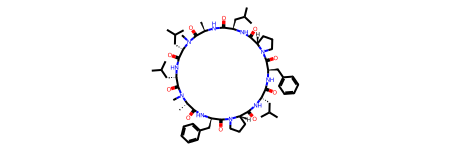

In [45]:
# df['Scaffold'][5]
# # Chem.MolFromSmiles("CC(C)C[C@@H]1NC(=O)[C@@H]2CCCN2C(=O)[C@@H](Cc2ccccc2)NC(=O)[C@H](C)N(C)C(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)N(C)C(=O)[C@@H](C)NC(=O)[C@@H](CC(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@@H](Cc2ccccc2)NC1=O")# 

In [10]:
# from rdkit import Chem
# from rdkit.Chem import AllChem

# mol = Chem.MolFromSmiles("CC(C)C[C@@H]1NC(=O)[C@@H]2CCCN2C(=O)[C@@H](Cc2ccccc2)NC(=O)[C@H](C)N(C)C(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)N(C)C(=O)[C@@H](C)NC(=O)[C@@H](CC(C)C)NC(=O)[C@@H]2CCCN2C(=O)[C@@H](Cc2ccccc2)NC1=O")
# mol = Chem.AddHs(mol) 
# numConfs = 1
# conformerIds = AllChem.EmbedMultipleConfs(mol, numConfs=numConfs, maxAttempts=1000, pruneRmsThresh=0.1, useExpTorsionAnglePrefs=True, useBasicKnowledge=True, enforceChirality=True)

# for cid in conformerIds:
#     AllChem.UFFOptimizeMolecule(mol, confId=cid)
# from rdkit.ML.Cluster import Butina

# # Calculate RMSD matrix
# rmsdMatrix = AllChem.GetConformerRMSMatrix(mol, prealigned=False)

# # Perform clustering
# rmsClusters = Butina.ClusterData(rmsdMatrix, mol.GetNumConformers(), 2.0, isDistData=True, reordering=True)

# # Select a representative from each cluster
# representativeConfs = [cluster[0] for cluster in rmsClusters]
# writer = Chem.SDWriter('conformers.sdf')
# for cid in representativeConfs:
#     writer.write(mol, confId=cid)
# writer.close()
# from rdkit import Chem

# sdf_filename = 'conformers.sdf'
# supplier = Chem.SDMolSupplier(sdf_filename)
# molecules = [mol for mol in supplier if mol is not None]


In [5]:
df

,SMILES,PAMPA,PC1,PC2
0,CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...,-6.62,0.049417,-1.368634
1,CC[C@@H](C)[C@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[...,-5.57,2.118523,-0.791363
2,CC(C)C[C@@H]1NC(=O)[C@@H](CC(C)C)NC(=O)[C@@H]2...,-5.64,2.877713,-2.770067
3,CC(C)C[C@H]1C(=O)N[C@@H](C)C(=O)N(C)[C@H](CC(C...,-5.91,1.881437,-2.520407
4,CC[C@H](C)[C@@H]1NC(=O)[C@@H](C(C)C)NC(=O)[C@@...,-5.60,1.862088,-1.085612
...,...,...,...,...
6554,COc1ccc(C[C@@H]2NC(=O)[C@@H](CC(C)C)NC(=O)[C@@...,-7.29,-1.588087,-1.345118
6555,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,-6.75,-1.855560,-1.284910
6556,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@H]...,-6.95,-0.870276,-1.182164
6557,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,-7.12,-0.749098,-1.244793


In [7]:
mol = Chem.MolFromSmiles(df['SMILES'][100])  # Example molecule
num_rotatable_bonds = rdMolDescriptors.CalcNumRotatableBonds(mol)
print(num_rotatable_bonds)

6


,SMILES,PAMPA,PC1,PC2,NumRotatableBonds
0,CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...,-6.62,0.049417,-1.368634,9
1,CC[C@@H](C)[C@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[...,-5.57,2.118523,-0.791363,11
2,CC(C)C[C@@H]1NC(=O)[C@@H](CC(C)C)NC(=O)[C@@H]2...,-5.64,2.877713,-2.770067,12
3,CC(C)C[C@H]1C(=O)N[C@@H](C)C(=O)N(C)[C@H](CC(C...,-5.91,1.881437,-2.520407,7
4,CC[C@H](C)[C@@H]1NC(=O)[C@@H](C(C)C)NC(=O)[C@@...,-5.60,1.862088,-1.085612,10
...,...,...,...,...,...
6554,COc1ccc(C[C@@H]2NC(=O)[C@@H](CC(C)C)NC(=O)[C@@...,-7.29,-1.588087,-1.345118,9
6555,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,-6.75,-1.855560,-1.284910,11
6556,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@H]...,-6.95,-0.870276,-1.182164,11
6557,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,-7.12,-0.749098,-1.244793,11


In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem

def IMHB_var(smiles):
    def find_intramolecular_hbonds(mol, confId=-1, eligibleAtoms=[7,8], distTol=2.5):
        """
        mol: RDKit molecule object
        confId: Conformer ID to use for distance calculation
        eligibleAtoms: List of atomic numbers for eligible H-bond donors or acceptors (N and O by default)
        distTol: Maximum accepted distance (in Ångströms) for an H-bond
        """
        res = []
        conf = mol.GetConformer(confId)
        for i in range(mol.GetNumAtoms()):
            atomi = mol.GetAtomWithIdx(i)
            if atomi.GetAtomicNum() == 1:  
                for j in range(mol.GetNumAtoms()):
                    atomj = mol.GetAtomWithIdx(j)
                    if atomj.GetAtomicNum() in eligibleAtoms:
                        d = conf.GetAtomPosition(i).Distance(conf.GetAtomPosition(j))
                        if d <= distTol:
                            res.append((i, j, d))
        return res

    def calc_rotatable_bonds(smiles):
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:  
            return rdMolDescriptors.CalcNumRotatableBonds(mol)
        else:
            return None

    def number_of_conformers(num_of_rotatable_bonds):
        if num_of_rotatable_bonds<=7:
            number_of_conformers=50
        elif num_of_rotatable_bonds>=8 and num_of_rotatable_bonds<=12:
            number_of_conformers=200
        else:
            number_of_conformers=300
        return number_of_conformers

    def cluster_conformers(mol, threshold=1.5):
        # print("Performing energy minimization and sorting conformers by energy...")
        conformers = mol.GetConformers()
        energies = []
        for conf in conformers:
            ff = AllChem.UFFGetMoleculeForceField(mol, confId=conf.GetId())
            ff.Minimize()
            energy = ff.CalcEnergy()
            energies.append((conf.GetId(), energy))
        energies.sort(key=lambda x: x[1])

        # print(f"Lowest energy conformer ID: {energies[0][0]}, Energy: {energies[0][1]}")
        
        keep = [energies[0][0]]
        
        # print("Clustering conformers based on RMSD threshold...")
        for index, (conf_id, energy) in enumerate(energies[1:]):
            # print(f"Analyzing conformer {conf_id} with energy {energy}...")
            unique = True
            for kept_id in keep:
                # print(f"  Comparing against conformer {kept_id}...")
                rmsd = AllChem.AlignMol(mol, mol, prbCid=conf_id, refCid=kept_id)
                # print(f"  RMSD between conformer {conf_id} and {kept_id}: {rmsd}")
                if rmsd < threshold:
                    unique = False
                    # print(f"  Conformer {conf_id} is similar to conformer {kept_id} (RMSD: {rmsd}). Discarding.")
                    break
            if unique:
                keep.append(conf_id)
                # print(f"  Conformer {conf_id} is unique and kept (Energy: {energy}).")
        
        # print(f"Total unique conformers after clustering: {len(keep)}")
        return keep



    # print("Starting hydrogen bond analysis...")
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    num_rotatable_bonds = calc_rotatable_bonds(smiles)
    num_conformers = number_of_conformers(num_rotatable_bonds)
    # print(f"Generating {num_conformers} conformers...")
    _ = AllChem.EmbedMultipleConfs(mol, numConfs=num_conformers, pruneRmsThresh=1, randomSeed=1)
    
    # print("Clustering conformers based on RMSD...")
    keep = cluster_conformers(mol)
    # print(f"{len(keep)} unique conformers identified after clustering.")
    
    hbond_lengths = []  
    for confId in keep:
        hbonds = find_intramolecular_hbonds(mol, confId=confId)
        hbond_lengths.append(len(hbonds))  
    
    return max(hbond_lengths)-min(hbond_lengths)  


def get_chameleonicity_like_descriptor(df):
    df['IMHB_var'] = df['SMILES'].apply(IMHB_var)
    return df

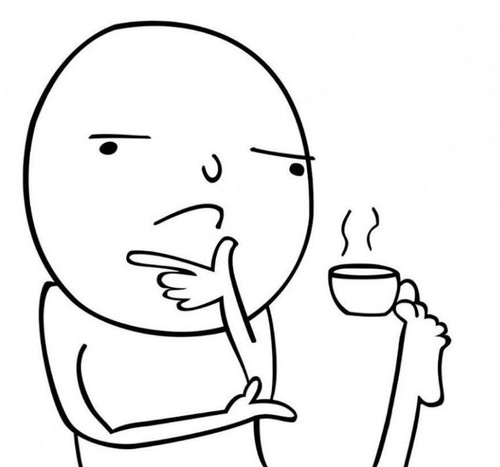

In [7]:
from concurrent.futures import ProcessPoolExecutor


In [8]:
get_chameleonicity_like_descriptor(df.head())

In [18]:
number_of_conformers(8)

200

In [14]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

def kennard_stone_percentage_split(df, smiles_col, percentage):
    """
    Splits the dataset into two DataFrames using the Kennard-Stone algorithm,
    automatically identifying descriptor columns and based on a percentage.
    
    Parameters:
    - df: DataFrame containing the dataset with descriptors and a SMILES column.
    - smiles_col: The name of the column containing the SMILES strings.
    - percentage: The percentage of samples to select.
    
    Returns:
    - selected_df: DataFrame with the selected samples.
    - remaining_df: DataFrame with the remaining samples.
    """
    
    # Identify descriptor columns (numeric columns excluding the SMILES column)
    descriptor_cols = df.select_dtypes(include=[np.number]).columns.drop(smiles_col, errors='ignore')
    
    # Extract the descriptor matrix
    x_variables = df[descriptor_cols].values
    original_x = x_variables.copy()
    
    # Calculate the number of samples to select based on the percentage
    num_samples = int(len(df) * percentage)
    
    # Calculate the Euclidean distance to the mean
    distance_to_average = np.sum((x_variables - np.mean(x_variables, axis=0))**2, axis=1)
    max_distance_index = np.argmax(distance_to_average)
    selected_indices = [max_distance_index]
    
    for _ in range(1, num_samples):
        remaining_indices = list(set(range(len(x_variables))) - set(selected_indices))
        selected_descriptors = original_x[selected_indices, :]
        remaining_descriptors = original_x[remaining_indices, :]
        
        distances = cdist(remaining_descriptors, selected_descriptors, 'euclidean')
        min_distances = np.min(distances, axis=1)
        max_min_distance_index = np.argmax(min_distances)
        
        selected_indices.append(remaining_indices[max_min_distance_index])
    
    # Create DataFrames for selected and remaining samples
    selected_df = df.iloc[selected_indices].reset_index(drop=True)
    remaining_indices = list(set(range(len(df))) - set(selected_indices))
    remaining_df = df.iloc[remaining_indices].reset_index(drop=True)
    
    return selected_df, remaining_df

test, test2 = kennard_stone_percentage_split(add_molecular_descriptors(df.head(), 'SMILES'), 'SMILES', 0.8)

In [16]:
test2

,SMILES,PAMPA,PC1,PC2,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)C[C@H]1C(=O)N[C@@H](C)C(=O)N(C)[C@H](CC(C...,-5.91,1.881437,-2.520407,14.726058,14.726058,0.063131,-1.143552,0.286879,30.422535,...,0,0,0,0,0,0,0,0,0,0


In [8]:


def generate_3d_descriptors(df, smiles_col):
    """
    Function to generate 3D descriptors for a DataFrame of SMILES strings.
    
    Parameters:
    - df: DataFrame containing the SMILES strings.
    - smiles_col: The name of the column containing the SMILES strings.
    
    Returns:
    - DataFrame with the original data and new columns for WHIM descriptors.
    """
    
    # Define a helper function to process each SMILES string
    def process_smiles(smiles):
        try:
            mol = Chem.MolFromSmiles(smiles)
            mol = Chem.AddHs(mol)  # Add hydrogens
            AllChem.EmbedMolecule(mol, randomSeed=0xf00d)  # Generate 3D coordinates
            AllChem.MMFFOptimizeMolecule(mol)  # Energy minimization
            whim_descriptors = CalcWHIM(mol)  # Calculate WHIM descriptors
            return whim_descriptors
        except:
            return [None] * 114  # Return None values if the process fails
    
    # Apply the helper function to each row in the DataFrame
    whim_results = df[smiles_col].apply(process_smiles)
    
    # Convert the results into a DataFrame and concatenate with the original DataFrame
    whim_df = pd.DataFrame(whim_results.tolist(), columns=[f'WHIM_{i}' for i in range(114)])
    result_df = pd.concat([df, whim_df], axis=1)
    
    return result_df





In [12]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

def add_molecular_descriptors(df, smiles_col):
    """
    Function to add molecular descriptors for a DataFrame of SMILES strings using RDKit.
    
    Parameters:
    - df: DataFrame containing the SMILES strings.
    - smiles_col: The name of the column containing the SMILES strings.
    
    Returns:
    - DataFrame with the original data and new columns for molecular descriptors.
    """
    
    # Define a helper function to calculate descriptors for each SMILES string
    def calculate_descriptors(smiles):
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:  # Check if the molecule could be parsed
                return [None] * len(Descriptors._descList)  # Return None values if the molecule could not be parsed
            return Descriptors.CalcMolDescriptors(mol)
        except:
            return [None] * len(Descriptors._descList)  # Return None values if the calculation fails
    
    # Apply the helper function to each row in the DataFrame
    descriptor_results = df[smiles_col].apply(calculate_descriptors)
    
    # Get the names of the descriptors
    descriptor_names = [desc[0] for desc in Descriptors._descList]
    
    # Convert the results into a DataFrame and concatenate with the original DataFrame
    descriptors_df = pd.DataFrame(descriptor_results.tolist(), columns=descriptor_names)
    result_df = pd.concat([df, descriptors_df], axis=1)
    
    return result_df


# Add molecular descriptors to the DataFrame
# df_with_descriptors = add_molecular_descriptors(df.head(), 'SMILES')
# df_with_descriptors.to_csv('test.csv')


In [43]:

def splitter(df):
    df['Scaffold'] = df['SMILES'].apply(MurckoScaffoldSmilesFromSmiles)
    fingerprints = [AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(smi), radius=2, nBits=1024) for smi in df["SMILES"]]

    mean_tan_sim = []

    for i, fp in enumerate(fingerprints):
        similarities = DataStructs.BulkTanimotoSimilarity(fp, fingerprints[:i] + fingerprints[i+1:])
        mean_similarity = sum(similarities) / len(similarities)
        mean_tan_sim.append(mean_similarity)

    df['Mean_Tanimoto_Similarity'] = mean_tan_sim

    df_sorted = df.sort_values(by='Mean_Tanimoto_Similarity')
    validation_set = df_sorted.iloc[:int(len(df) * 0.1)]

    df_remaining = df_sorted.iloc[int(len(df) * 0.1):]

    scaffold_counts = df_remaining['Scaffold'].value_counts()
    single_instance_scaffolds = scaffold_counts[scaffold_counts == 1].index
    multi_instance_df = df_remaining[~df_remaining['Scaffold'].isin(single_instance_scaffolds)]
    single_instance_df = df_remaining[df_remaining['Scaffold'].isin(single_instance_scaffolds)]

    train_size = 0.8 / (0.8 + 0.1) 

    train_set, test_set = train_test_split(multi_instance_df, 
                                       test_size=1-train_size, 
                                       stratify=multi_instance_df['Scaffold'],
                                       random_state=42)


    train_set = pd.concat([train_set, single_instance_df])
    return train_set, test_set, validation_set

train, test, val = splitter(df)




In [8]:
def random_splitter(df):

    train_df, temp_test_df = train_test_split(df, train_size=0.8, random_state=42, shuffle=True)

    val_df, test_df = train_test_split(temp_test_df, test_size=0.5, random_state=42, shuffle=True)

    return train_df, test_df, val_df


In [28]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

def generate_morgan_descriptors(df, smiles_col='SMILES', radius=2):
    """
    Generates Morgan count descriptors for a dataframe containing SMILES structures.

    Parameters:
    - df: DataFrame containing SMILES strings.
    - smiles_col: Name of the column containing SMILES strings.
    - radius: The radius of the Morgan fingerprints.

    Returns:
    - DataFrame with Morgan count descriptors added.
    """
    # Initialize a list to hold the Morgan count descriptors
    morgan_descriptors = []
    
    # Iterate over the rows in the dataframe
    for index, row in df.iterrows():
        # Convert the SMILES string to an RDKit molecule object
        mol = Chem.MolFromSmiles(row[smiles_col])
        
        # Calculate the Morgan count descriptors (ECFP)
        fp = AllChem.GetMorganFingerprint(mol, radius=radius, useCounts=True)
        
        # Convert the fingerprint to a dictionary of {bit: count}
        fp_dict = fp.GetNonzeroElements()
        
        # Append the dictionary to the list of descriptors
        morgan_descriptors.append(fp_dict)
    
    # Convert the list of dictionaries to a DataFrame
    fp_df = pd.DataFrame(morgan_descriptors)
    
    # Fill NaN values with zeros, as they represent non-existent bits for certain molecules
    fp_df = fp_df.fillna(0).astype(int)
    
    # Concatenate the original dataframe with the fingerprints dataframe
    result_df = pd.concat([df, fp_df], axis=1)
    
    return result_df

# Example usage:
# Assume 'df' is your dataframe and 'SMILES' is the column with SMILES strings
# df_with_descriptors = generate_morgan_descriptors(df, 'SMILES')


In [29]:
new_df = generate_morgan_descriptors(df)

In [30]:
new_df

,SMILES,PAMPA,PC1,PC2,10565946,26892922,98513984,124121423,145479508,172238518,...,4179862704,2549196227,3026394695,3253890070,4289710588,851457696,3512548495,1018838551,2227589528,2221177404
0,CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...,-6.62,0.049417,-1.368634,9,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
1,CC[C@@H](C)[C@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[...,-5.57,2.118523,-0.791363,10,3,3,3,1,3,...,0,0,0,0,0,0,0,0,0,0
2,CC(C)C[C@@H]1NC(=O)[C@@H](CC(C)C)NC(=O)[C@@H]2...,-5.64,2.877713,-2.770067,10,2,0,6,4,6,...,0,0,0,0,0,0,0,0,0,0
3,CC(C)C[C@H]1C(=O)N[C@@H](C)C(=O)N(C)[C@H](CC(C...,-5.91,1.881437,-2.520407,10,3,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
4,CC[C@H](C)[C@@H]1NC(=O)[C@@H](C(C)C)NC(=O)[C@@...,-5.60,1.862088,-1.085612,10,3,3,2,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554,COc1ccc(C[C@@H]2NC(=O)[C@@H](CC(C)C)NC(=O)[C@@...,-7.29,-1.588087,-1.345118,7,3,0,3,3,3,...,0,0,0,0,0,0,0,0,0,0
6555,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,-6.75,-1.855560,-1.284910,6,1,0,4,4,4,...,0,0,0,0,0,0,0,0,0,0
6556,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@H]...,-6.95,-0.870276,-1.182164,7,2,0,4,4,4,...,0,0,0,0,0,0,0,0,0,0
6557,COc1ccc(C[C@@H]2NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,-7.12,-0.749098,-1.244793,7,2,0,4,4,4,...,0,0,0,0,0,0,0,0,0,0


def random_splitter:

In [37]:
def check_leakage(train_set, test_set, validation_set):
    train_indices = set(train_set.index)
    test_indices = set(test_set.index)
    validation_indices = set(validation_set.index)

    train_test_overlap = train_indices.intersection(test_indices)
    train_validation_overlap = train_indices.intersection(validation_indices)
    test_validation_overlap = test_indices.intersection(validation_indices)

    # Print the results
    print("Overlap between train and test sets:", train_test_overlap)
    print("Overlap between train and validation sets:", train_validation_overlap)
    print("Overlap between test and validation sets:", test_validation_overlap)

    assert len(train_test_overlap) == 0, "There is an overlap between train and test sets."
    assert len(train_validation_overlap) == 0, "There is an overlap between train and validation sets."
    assert len(test_validation_overlap) == 0, "There is an overlap between test and validation sets."

    print("All sets are unique with no overlap.")


Overlap between train and test sets: set()
Overlap between train and validation sets: set()
Overlap between test and validation sets: set()
All sets are unique with no overlap.


In [52]:
# Assuming df is your pandas DataFrame with columns 'smiles' and 'permeability'
smiles = df['SMILES'].tolist()
permeability = df['PAMPA'].values

# Convert to Numpy array if not already in that format
permeability = permeability.reshape(-1, 1)

# Featurize the SMILES strings
featurizer = dc.feat.CircularFingerprint(size=1024)
features = featurizer.featurize(smiles)

# Create a DeepChem dataset
dataset = dc.data.DiskDataset.from_numpy(features, permeability, ids=smiles)


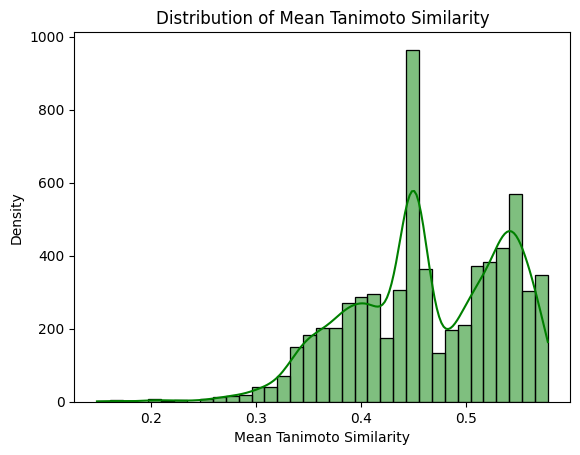

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Mean_Tanimoto_Similarity'], kde=True, color='green')
plt.title('Distribution of Mean Tanimoto Similarity')
plt.xlabel('Mean Tanimoto Similarity')
plt.ylabel('Density')
plt.show()


In [29]:
splitter = ScaffoldSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)


In [32]:
valid_dataset

<DiskDataset X.shape: (5874, 1024), y.shape: (5874, 1), w.shape: (5874, 1), task_names: [0]>

In [26]:
pandas_test_dataset  = test_dataset.to_dataframe()

ValueError: need at least one array to concatenate